In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq='D'

In [5]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [8]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [9]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [11]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for col in cols:
    df1[col] = df1[col].astype(int)
    
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


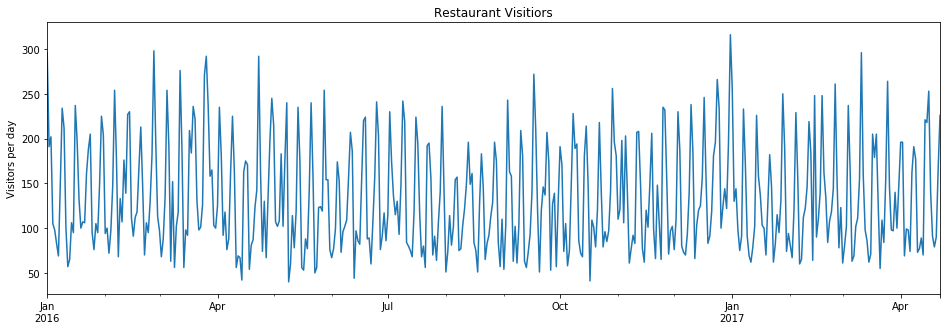

In [12]:
title = 'Restaurant Visitiors'
ylabel = 'Visitors per day'
xlabel = ''
ax = df1['total'].plot(figsize = (16,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

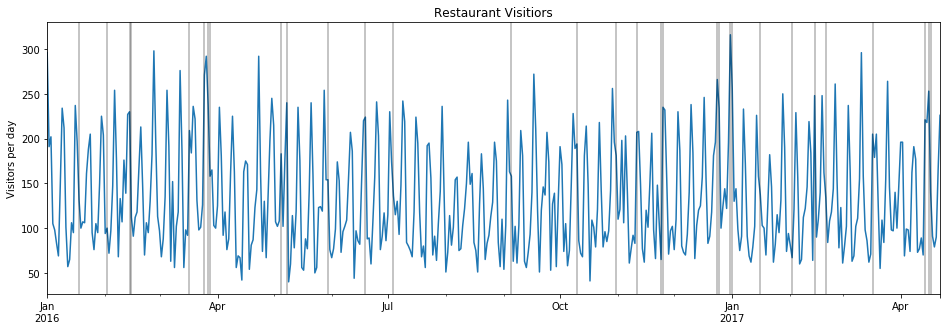

In [13]:
title = 'Restaurant Visitiors'
ylabel = 'Visitors per day'
xlabel = ''
ax = df1['total'].plot(figsize = (16,5), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='k', alpha=0.3)

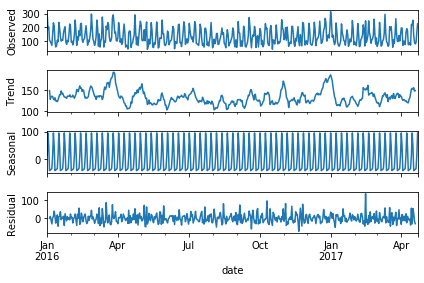

In [14]:
resd = seasonal_decompose(df1['total'])
resd.plot();

In [56]:
stepwise_fit = auto_arima(df1['total'], seasonal=True, max_order=6, d=1, D=1, m=7, stepwise=False, trace=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 7); AIC=4648.066, BIC=4681.288, Fit time=2.958 seconds
Total fit time: 2.960 seconds


In [70]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [71]:
model = SARIMAX(train['total'], order=(0,1,2), seasonal_order=(0,1,1,7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 7)   Log Likelihood               -2111.981
Date:                           Tue, 02 Jun 2020   AIC                           4231.963
Time:                                   16:52:28   BIC                           4248.199
Sample:                               01-01-2016   HQIC                          4238.376
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8253      0.048    -17.122      0.000      -0.920      -0.731
ma.L2         -0.1236      0.050     -2.497      0.013      -0.221      -0.027
ma.S.L7       -0.9613      0.027    -36.254      0.000      -1.013      -0.909
sigma2      1073.3857     54.029     19.867      0.000     967.490    1179.281
===================================================================================
Ljung-Box (Q):                       34.75   Jarque-Bera (JB):               102.88
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.83
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(0, 1, 2)x(0, 1, 1, 7) Predictions')
predictions.head()

2017-03-12    184.974042
2017-03-13     90.873173
2017-03-14     99.476057
2017-03-15     98.134383
2017-03-16    101.152946
Freq: D, Name: SARIMA(0, 1, 2)x(0, 1, 1, 7) Predictions, dtype: float64

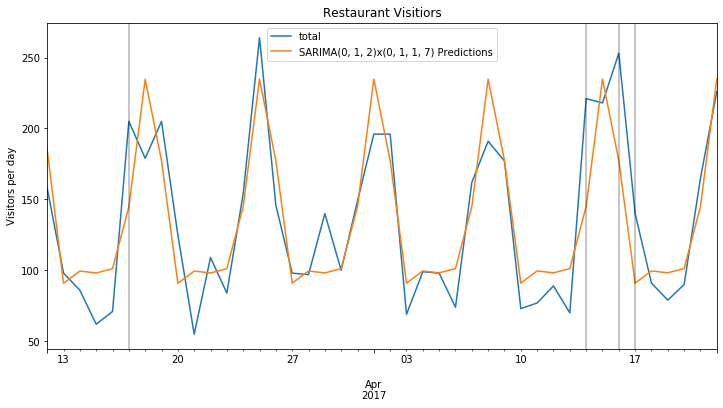

In [73]:
title = 'Restaurant Visitiors'
ylabel = 'Visitors per day'
xlabel = ''

ax = test['total'].plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='k', alpha=0.3)

In [74]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['total'], predictions)
print(error)

961.6895478797326


In [75]:
from statsmodels.tools.eval_measures import rmse
rmseError = rmse(test['total'], predictions)
print(rmseError)

31.011119745661112


In [76]:
model_exog = SARIMAX(train['total'], exog=train['holiday'], order=(0,1,2), seasonal_order=(0,1,1,7),
                    enforce_invertibility=False)
results_exog = model_exog.fit()
results_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 7)   Log Likelihood               -2045.763
Date:                           Tue, 02 Jun 2020   AIC                           4101.527
Time:                                   16:54:14   BIC                           4121.822
Sample:                               01-01-2016   HQIC                          4109.542
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.6056      3.852     17.812      0.000      61.056      76.155
ma.L1         -0.8072      0.048    -16.868      0.000      -0.901      -0.713
ma.L2         -0.1622      0.050     -3.223      0.001      -0.261      -0.064
ma.S.L7       -0.9583      0.027    -35.129      0.000      -1.012      -0.905
sigma2       786.2654     44.923     17.503      0.000     698.218     874.312
===================================================================================
Ljung-Box (Q):                       34.36   Jarque-Bera (JB):                19.64
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.23
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
start = len(train)
end = len(train) + len(test) - 1
exog_forecast = test[['holiday']]
predictions_exog = results_exog.predict(start=start, end=end, exog=exog_forecast).rename('SARIMA(0, 1, 2)x(0, 1, 1, 7) Exog Predictions')
predictions_exog.head()

2017-03-12    181.188520
2017-03-13     79.562146
2017-03-14     96.682884
2017-03-15     98.138201
2017-03-16     95.985289
Freq: D, Name: SARIMA(0, 1, 2)x(0, 1, 1, 7) Exog Predictions, dtype: float64

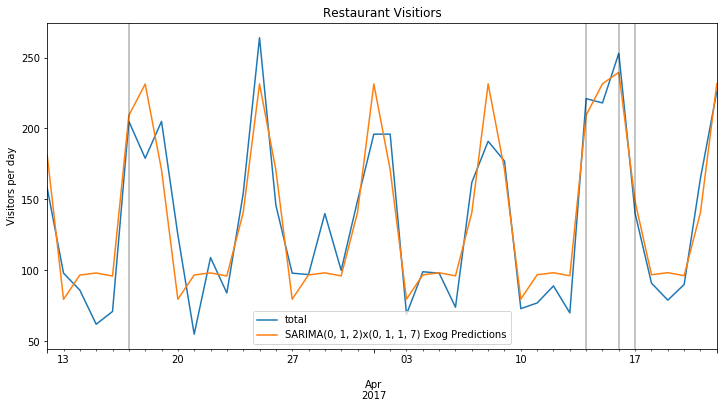

In [78]:
title = 'Restaurant Visitiors'
ylabel = 'Visitors per day'
xlabel = ''

ax = test['total'].plot(legend=True, figsize=(12,6), title=title)
predictions_exog.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='k', alpha=0.3)

In [81]:
rmseError = rmse(test['total'], predictions)
print(rmseError)
rmseError_exog = rmse(test['total'], predictions_exog)
print(rmseError_exog)

31.011119745661112
23.09175785179496
